<h1 align="center"> PCA + Logistic Regression (MNIST) </h1>

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

Four Files are available on this site:

[train-images-idx3-ubyte.gz:  training set images (9912422 bytes)](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz) 
<br>
[train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz)
<br>
[t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz) 
<br>
[t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz)

Include Table here of dimensionality

In [1]:
import pandas as pd
import numpy as np 
# Suppress scientific notation
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Used for Loading MNIST
from struct import unpack

%matplotlib inline

You can download the data via command line (you can see this on the youtube video) or you can get them from the website or my github. 

## Downloading MNIST Dataset

<b>If you cant unzip the file, you can try gzip or download it from [my github](https://github.com/mGalarnyk/Python_Tutorials/tree/master/Sklearn/Logistic_Regression/data)</b>

In [2]:
# decompress gzipped file
# !info gzip
# !gzip -d data/*.gz

## Loading MNIST Dataset

In [3]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [4]:
train_img, train_lbl = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

In [5]:
print(train_img.shape)

(60000, 784)


In [6]:
print(train_lbl.shape)

(60000,)


In [7]:
print(test_img.shape)

(10000, 784)


In [8]:
print(test_lbl.shape)

(10000,)


## Showing Training Digits and Labels

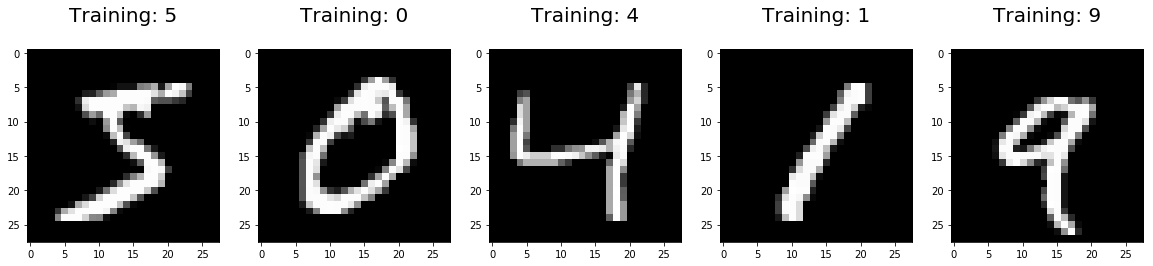

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
# This is how the computer sees the number 5
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
print('hi')

hi


In [12]:
u,s,v = np.linalg.svd(train_img.T, full_matrices=False)

In [21]:
u

array([[-0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.27912624,  0.11150906],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.45716139,  0.44563819],
       [ 0.        ,  0.        , -0.        , ...,  0.        ,
        -0.23366141,  0.57551898],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
s.shape

(784,)

## Find Number of Principal Components with 95% of Explained Variance

maybe try to mimic the 

In [13]:
pca = PCA(n_components=784)

In [14]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

This gives us an object we can use to transform our data by calling transform.

In [15]:
# pca.transform(train_img)

In [16]:
tot = sum(pca.explained_variance_)
tot

3428502.5747802043

In [17]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.7046643597139379, 7.0959240590944637, 6.1690887623681423, 5.389419486553364, 4.8687970234748263]


In [18]:
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance

NameError: name 'eig_vals' is not defined

In [ ]:
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [ ]:
np.argmax(cum_var_exp > 95)

In [ ]:
plt.axhline?

In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(0, 784), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(0, 784), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')
plt.show()

In [ ]:
pca = PCA(n_components=153)

In [ ]:
pca.fit(train_img)

In [ ]:
pcStuff = pca.transform(train_img)

In [ ]:
pca.components_.shape

In [ ]:
https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

# Normalised [0,255] as integer
pd.DataFrame(data = (255*(pcStuff - np.max(pcStuff))/-np.ptp(pcStuff)).astype(int))

## Using Logistic Regression on Entire Dataset 

[Logistic Regression Sklearn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
One thing I like to mention is the importance of parameter tuning. While it may not have mattered much for the toy digits dataset, it can make a major difference on larger and more complex datasets you have. <b>Please see the parameter: solver</b>

<b>Step 1: </b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
from sklearn.linear_model import LogisticRegression 

<b>Step 2:</b> Make an instance of the Model

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [ ]:
logisticRegr.fit(train_img, train_lbl)

<b>Step 4:</b> Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [ ]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

<b>Note: Seaborn needs to be installed for this portion </b>

In [ ]:
# !conda install seaborn -y

In [ ]:
# Make predictions on test data
predictions = logisticRegr.predict(test_img)

In [ ]:
cm = metrics.confusion_matrix(test_lbl, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

## Display Misclassified images with Predicted Labels

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)

## Checking Performance Based on Training Set Size

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [ ]:
regr = LogisticRegression(solver = 'lbfgs')

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 60000]):
    X_train = train_img[:sample_size].reshape(sample_size, 784)
    y_train = train_lbl[:sample_size]
    regr.fit(X_train, y_train)
    predicted = regr.predict(test_img)
    cm = metrics.confusion_matrix(test_lbl, predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(test_img, test_lbl)) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);